In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib widget

## Exploration and cleanup

In [2]:
products = pd.read_csv('data/products.csv')

products.columns = products.columns.str.lower().str.removeprefix('product_')

products['id'] = pd.to_numeric(products['id'].str.removeprefix('P-'))
products = products.set_index('id')

products['category_id'] = pd.to_numeric(products['category_id'].str.removeprefix('CAT-'))

products['launch_date'] = pd.to_datetime(products['launch_date'])

display(products.head())
products.info()

,name,category_id,launch_date,price
id,,,,
1,MacBook,1,2023-09-17,1149
2,MacBook Air (M1),1,2023-11-11,1783
3,MacBook Air (M2),1,2020-05-24,1588
4,MacBook Pro 13-inch,1,2021-01-17,1351
5,MacBook Pro 14-inch,1,2024-05-12,768


<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 1 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         89 non-null     object        
 1   category_id  89 non-null     int64         
 2   launch_date  89 non-null     datetime64[ns]
 3   price        89 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.5+ KB


In [3]:
category = pd.read_csv('data/category.csv')

category.columns = category.columns.str.removeprefix('category_')

category['id'] = pd.to_numeric(category['id'].str.removeprefix('CAT-'))
category = category.set_index('id')

display(category.head())
category.info()

,name
id,
1,Laptop
2,Audio
3,Tablet
4,Smartphone
5,Wearable


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


In [4]:
stores = pd.read_csv('data/stores.csv')

stores.columns = stores.columns.str.lower().str.removeprefix('store_')

stores['id'] = pd.to_numeric(stores['id'].str.removeprefix('ST-'))
stores = stores.set_index('id')

display(stores.head())
stores.info()

,name,city,country
id,,,
1,Apple Fifth Avenue,New York,United States
2,Apple Union Square,San Francisco,United States
3,Apple Michigan Avenue,Chicago,United States
4,Apple The Grove,Los Angeles,United States
5,Apple SoHo,New York,United States


<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1 to 75
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     75 non-null     object
 1   city     75 non-null     object
 2   country  75 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [5]:
warranty = pd.read_csv('data/warranty.csv')

warranty.columns = warranty.columns.str.removeprefix('claim_')

warranty['id'] = pd.to_numeric(warranty['id'].str.removeprefix('CL-'))
warranty = warranty.set_index('id')

warranty['date'] = pd.to_datetime(warranty['date'])

display(warranty.head())
warranty.info()

,date,sale_id,repair_status
id,,,
58750,2024-01-30,YG-8782,Completed
8874,2024-06-25,QX-999001,Pending
14486,2024-08-13,JG-46890,Pending
42187,2024-09-19,XJ-1731,Pending
37590,2024-09-16,FG-95080,Completed


<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 58750 to 78522
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30000 non-null  datetime64[ns]
 1   sale_id        30000 non-null  object        
 2   repair_status  30000 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 937.5+ KB


In [6]:
sales = pd.read_csv('data/sales.csv')

sales.columns = sales.columns.str.removeprefix('sale_')

sales = sales.set_index('id')

sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

sales['store_id'] = pd.to_numeric(sales['store_id'].str.removeprefix('ST-'))
sales['product_id'] = pd.to_numeric(sales['product_id'].str.removeprefix('P-'))

display(sales.head())
sales.info()

,date,store_id,product_id,quantity
id,,,,
YG-8782,2023-06-16,10,38,10
QX-999001,2022-04-13,63,48,10
JG-46890,2021-07-05,26,79,5
XJ-1731,2022-07-20,15,24,9
FG-95080,2022-03-18,35,69,7


<class 'pandas.core.frame.DataFrame'>
Index: 1040200 entries, YG-8782 to FJ-0643
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1040200 non-null  datetime64[ns]
 1   store_id    1040200 non-null  int64         
 2   product_id  1040200 non-null  int64         
 3   quantity    1040200 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.7+ MB


## Descriptive analysis

### Revenue by country

In [7]:
sales['year'] = sales['date'].dt.year

joined_sales = (sales
    .join(stores['country'], on='store_id')
    .join(products['price'], on='product_id')
    .drop(['date', 'store_id', 'product_id'], axis=1)
)

joined_sales['revenue'] = joined_sales['quantity'] * joined_sales['price']

groupby = joined_sales.groupby(['year', 'country'])
    
agg_sales = groupby.agg(
    units_sold = ('quantity', 'sum'),
    total_revenue = ('revenue', 'sum'),
)
agg_sales['n_orders'] = groupby.size()

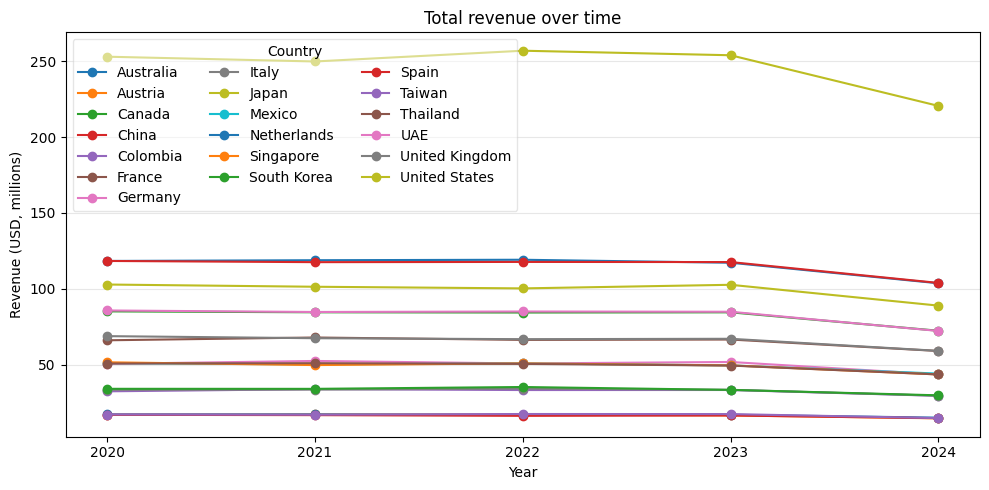

In [8]:
from matplotlib.ticker import MaxNLocator

one_million = 1e6

df_plot = (agg_sales['total_revenue']
    .unstack('country')
    .sort_index()
    / one_million
)

fig, ax = plt.subplots(figsize=(10, 5))
df_plot.plot(ax=ax, marker='o')

ax.set_title('Total revenue over time')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (USD, millions)')

ax.legend(title='Country', framealpha=0.5, ncol=3, loc='upper left')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.grid(True, axis='y', alpha=0.3)
fig.tight_layout()

### Top products sold

In [9]:
products_sold = (sales
    .drop(['date', 'store_id', 'year'], axis=1)
    .groupby('product_id')
    .sum()
    .join(products, how='right')
)

products_sold['total_revenue'] = products_sold['quantity'] * products_sold['price']

products_sold.sort_values('total_revenue', ascending=False).head()

,quantity,name,category_id,launch_date,price,total_revenue
id,,,,,,
68,63844,Apple Music,8,2020-09-26,1965,125453460
58,64654,iMac 27-inch,7,2022-05-17,1918,124006372
25,64828,iPad mini (5th Generation),3,2023-01-10,1912,123951136
23,63597,iPad (9th Generation),3,2022-03-08,1949,123950553
17,64410,Beats Fit Pro,2,2022-12-23,1839,118449990


### Top categories sold

In [10]:
category_sold = (products_sold
    .groupby('category_id')[['quantity', 'total_revenue']]
    .sum()
    .join(category, how='right')
)

cat_total = category_sold['total_revenue'].sum()
category_sold['revenue_share'] = category_sold['total_revenue'] / cat_total

category_sold.sort_values('total_revenue', ascending=False).head()

,quantity,total_revenue,name,revenue_share
id,,,,
3,645303,953443623,Tablet,0.154622
10,899734,927115953,Accessories,0.150352
4,834006,865147932,Smartphone,0.140303
2,707354,794980579,Audio,0.128924
1,640336,763382551,Laptop,0.123799


### Warranty claims rate

In [11]:
products_sold['warranty_claims'] = warranty.join(sales['product_id'], on='sale_id').groupby('product_id').size()
products_sold['warranty_claims_rate'] = products_sold['warranty_claims'] / products_sold['quantity']

products_sold.sort_values('warranty_claims_rate', ascending=False).head()

,quantity,name,category_id,launch_date,price,total_revenue,warranty_claims,warranty_claims_rate
id,,,,,,,,
9,63691,MacBook Pro (Touch Bar),1,2024-06-17,1304,83053064,381,0.005982
38,63711,iPhone 13 Pro,4,2021-03-22,308,19622988,367,0.005760
17,64410,Beats Fit Pro,2,2022-12-23,1839,118449990,370,0.005744
69,64103,Apple TV+,8,2024-11-04,404,25897612,368,0.005741
87,63890,MagSafe Charger,10,2024-03-27,1744,111424160,366,0.005729


### Top sales over time

In [12]:
sales_per_day = (
    sales.groupby(['date', 'product_id'])['quantity']
    .sum()
    .unstack('product_id', fill_value=0)
    .sort_index()
)

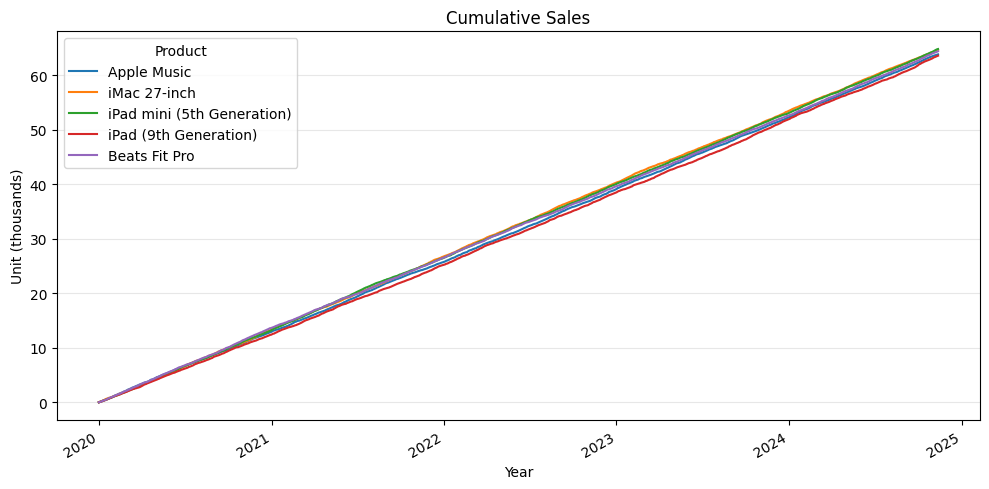

In [13]:
top_5_products = (
    products_sold.sort_values('total_revenue', ascending=False)
    .head(5)['name']
)

one_thousand = 1e3

plot_df = (
    sales_per_day.T 
    .join( 
        top_5_products,
        how='right'
    )
    .set_index('name').T
    .cumsum()
) / one_thousand

fig, ax = plt.subplots(figsize=(10, 5))
plot_df.plot(ax=ax)

ax.set_title('Cumulative Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Unit (thousands)')

ax.legend(title='Product')

ax.grid(True, axis='y', alpha=0.3)
fig.tight_layout()

## Synthetic dataset

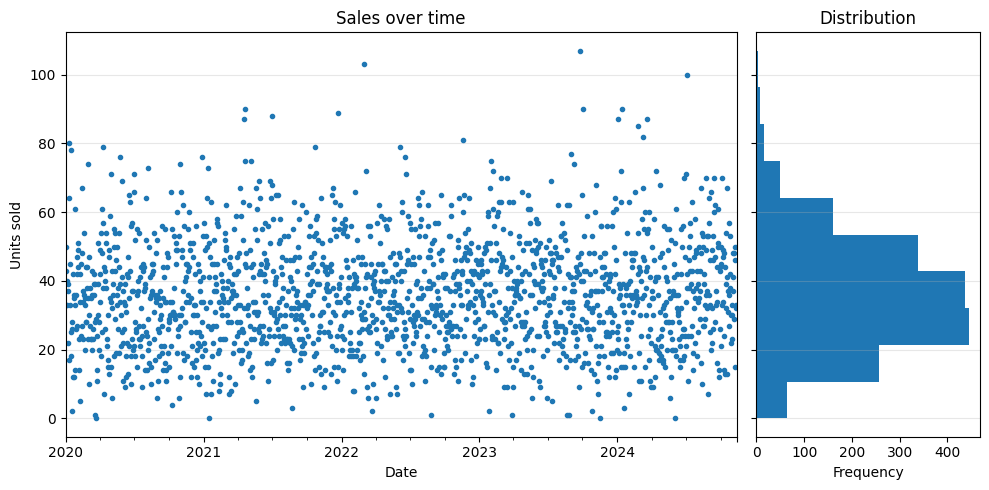

In [14]:
fig, (ax_time, ax_hist) = plt.subplots(
    1, 2, figsize=(10, 5), sharey=True,
    gridspec_kw={'width_ratios': [3, 1]}
)

sales_per_day[1].plot(ax=ax_time, style='.')
ax_time.set_title('Sales over time')
ax_time.set_xlabel('Date')
ax_time.set_ylabel('Units sold')
ax_time.grid(True, axis='y', alpha=0.3)

sales_per_day[1].plot.hist(ax=ax_hist, orientation='horizontal', bins=10)
ax_hist.set_title('Distribution')
ax_hist.set_xlabel('Frequency')
ax_hist.grid(True, axis='y', alpha=0.3)

fig.tight_layout()

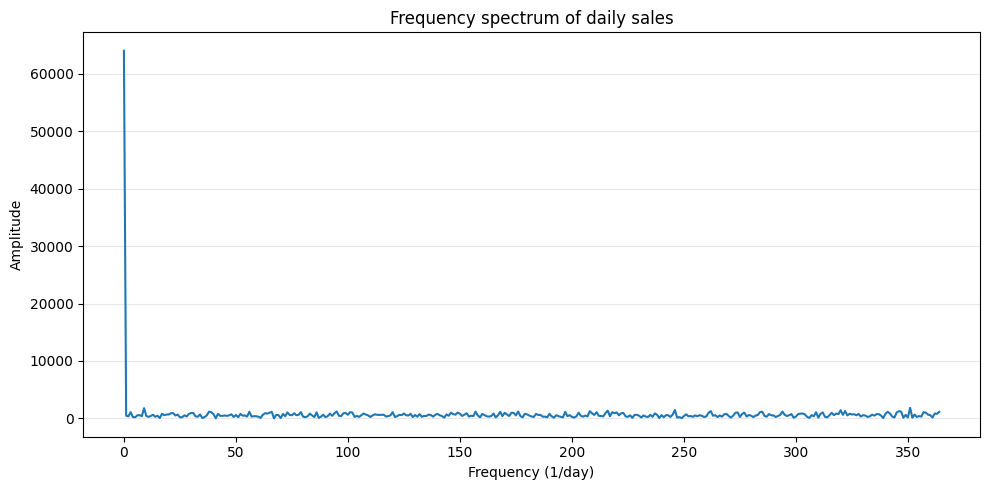

In [15]:
from scipy.fft import fft

y = fft(sales_per_day[1])[:365]
x = np.arange(y.shape[0])

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, np.abs(y))

ax.set_title('Frequency spectrum of daily sales')
ax.set_xlabel('Frequency (1/day)')
ax.set_ylabel('Amplitude')

ax.grid(True, axis='y', alpha=0.3)

fig.tight_layout()